<a href="https://qworld.net" target="_blank" align="left"><img src="../qworld/images/header.jpg"  align="left"></a>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\I}{ \mymatrix{rr}{1 & 0 \\ 0 & 1}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\greenbit}[1] {\mathbf{{\color{green}#1}}} $
$ \newcommand{\bluebit}[1] {\mathbf{{\color{blue}#1}}} $
$ \newcommand{\redbit}[1] {\mathbf{{\color{red}#1}}} $
$ \newcommand{\brownbit}[1] {\mathbf{{\color{brown}#1}}} $
$ \newcommand{\blackbit}[1] {\mathbf{{\color{black}#1}}} $


<font style="font-size:28px;" align="left"><b> Construction d'un Controle Mutiple </b></font>
<br>

_prepared by Maksim Dimitrijev and Abuzer Yakaryilmaz_ 


_traduit par Edwige Carole Fosso_
<br><br>
[<img src="../qworld/images/watch_lecture.jpg" align="left">](https://youtu.be/eoFJdS5BwkA)
<br><br><br>

N'oubliez pas que lors de l'application de la porte CNOT, l'opérateur NOT est appliqué au qubit cible si le qubit de contrôle est dans l'état$\ket{1}$:

$$ CNOT= \mymatrix{cc|cc}{\blackbit{1} & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1} \\  0 & 0 & \bluebit{1} & 0} . $$

Comment obtenir l'opérateur suivant, dans lequel l'opérateur NOT est appliqué au qubit cible si le qubit de contrôle est dans l'état $ \ket{0} $?

$$ C_0NOT = \mymatrix{cc|cc}{0 & \bluebit{1} & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 \\  0 & 0 & 0 & \blackbit{1}} . $$

Comme mentionné également dans le programme d'operations sur les bits multiples dans le cas classique, [Operators on Multiple Bits](../classical-systems/CS40_Operators_on_Multiple_Bits.ipynb), nous pouvons appliquer un opérateur $ NOT $ sur le bit de contrôle avant d'appliquer l'opérateur $ CNOT $ afin que l'opérateur $ NOT $ soit appliqué au qubit cible lorsque le qubit de contrôle a été dans l'état $ \ket{0} $. Pour récupérer la valeur précédente du qubit de contrôle, on applique à nouveau l'opérateur $ NOT $ après l'opérateur $ CNOT $. En bref:
<ul>
    <li>appliquer l'opérateur $ NOT $ au qubit de contrôle,</li>
    <li>appliquer l'opérateur $ CNOT $ , et,</li>
    <li>appliquer l'opérateur $ NOT $ au qubit de contrôle.</li>
</ul>

Nous pouvons implémenter cette idée dans Qiskit comme suit:

CNOT(0) = 
0.0  1.0  0.0  0.0  
1.0  0.0  0.0  0.0  
0.0  0.0  1.0  0.0  
0.0  0.0  0.0  1.0  


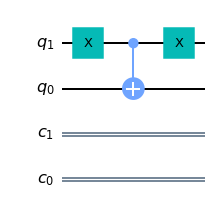

In [20]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

q = QuantumRegister(2, "q")
c = ClassicalRegister(2, "c")

qc = QuantumCircuit(q,c)

qc.x(q[1])

qc.cx(q[1],q[0])

# Returning control qubit to the initial state
qc.x(q[1])

job = execute(qc,Aer.get_backend('unitary_simulator'), shots = 1)
U=job.result().get_unitary(qc,decimals=3).data

print("CNOT(0) = ")
for row in U:
    s = ""
    for value in row:
        s = s + str(round(value.real,2)) + "  "
    print(s)

qc.draw(output="mpl", reverse_bits=True)

En utilisant cette astuce, des opérateurs conditionnels plus complexes peuvent être implémentés.

<h3>CCNOT</h3>

Maintenant, nous introduisons la porte $ CCNOT $ : **controlled-controlled-not operator** ([Toffoli gate](https://en.wikipedia.org/wiki/Toffoli_gate)), qui est contrôlée par deux qubits. L'implementation de la porte $CCNOT$ dans Qiskit est la suivante:


    circuit.ccx(control-qubit1,control-qubit2,target-qubit)

Ceci etant, l'opérateur $ NOT $ est appliqué au qubit cible lorsque les deux qubits de contrôle sont dans l'état $\ket{1}$. Sa représentation matricielle est la suivante:

$$ CCNOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} \\ 0 & 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0}. $$


<h3>Tâche 1</h3>

Implémentez chacun des opérateurs suivants dans Qiskit en utilisant trois qubits. Vérifiez votre implémentation en utilisant le backend "unitary_simulator". <br><br>

<font size="-2">
$$
    C_0C_0NOT = \mymatrix{cc|cc|cc|cc}{0 & \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \bluebit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~
    C_0C_1NOT = \mymatrix{cc|cc|cc|cc}{ \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 \\ 0 & 0 & \bluebit{1}  & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}, ~~ \mbox{and} ~~
    C_1C_0NOT = \mymatrix{cc|cc|cc|cc}{\blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & \blackbit{1} & 0 & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 \\ 0 & 0 & 0 & 0 & \bluebit{1} & 0 & 0 & 0 \\ \hline 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1} & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & \blackbit{1}}.   
$$
    </font>

In [10]:
#
# Implementez votre solution ici
#


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task1">cliquez pour notre solution</a>

<h3>Plus de contrôles</h3>

Nous présentons ici les méthodes de base sur la façon d'implémenter des portes $ NOT $ contrôlées par plus de deux qubits en utilisant $CNOT$, $ CNOT $ et certains qubits auxiliaires (auxiliaires).

*(Notez que Qiskit dispose d'une méthode appelée « mct » pour implémenter de telles portes. Un autre opérateur à contrôle multiple dans Qiskit est « mcrz ».)*

#### Implémentation de la porte CCCNOT 

Nous donnons l'implémentation de la porte $ CCCNOT $ : l'opérateur $NOT$ est appliqué au qubit cible lorsque les qubits de contrôle sont dans l'état $ \ket{111} $. Cette porte nécessite 4 qubits. Nous utilisons également un qubit auxiliaire.

Nos qubits sont $ q_{aux}, q_ 3, q_2, q_1, q_ 0 $, et le qubit auxiliaire $q_{aux}$ devrait être dans l'état $\ket{0}$ après chaque utilisation. L'implémentation de la porte $ CCCNOT $ dans Qiskit est donnée ci-dessous. Les brèves explications sont données sous forme de commentaires.

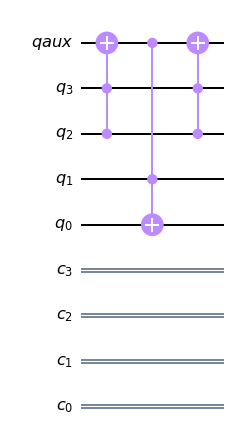

In [21]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

qaux = QuantumRegister(1,"qaux")
q = QuantumRegister(4,"q")
c = ClassicalRegister(4,"c")

qc = QuantumCircuit(q,qaux,c)

# étape 1 : définissez qaux sur |1> si q3 et q2 sont tous deux dans |1>

qc.ccx(q[3],q[2],qaux[0])

# étape 2 : appliquer la porte NOT à q0 si qaux et q1 sont dans |1>

qc.ccx(qaux[0],q[1],q[0])

# étape 3 : définissez qaux sur |0> si q3 et q2 sont tous deux dans |1> en inversant l'effet de l'étape 1

qc.ccx(q[3],q[2],qaux[0])

qc.draw(output="mpl",reverse_bits=True)

Maintenant, nous exécutons ce circuit sur toutes les entrées possibles et vérifions expérimentalement l’exactitude de l’implémentation.

In [22]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_inputs=[]
for q3 in ['0','1']:
    for q2 in ['0','1']:
        for q1 in ['0','1']:
            for q0 in ['0','1']:
                all_inputs.append(q3+q2+q1+q0)

# affichez (toutes les entrées)

print("input --> output")
for the_input in all_inputs:
    # créer le circuit
    qaux = QuantumRegister(1,"qaux")
    q = QuantumRegister(4,"q")
    c = ClassicalRegister(4,"c")
    qc = QuantumCircuit(q,qaux,c)
    # définissez la valeur initiale du circuit par rapport à l'entrée
    if the_input[0] =='1': qc.x(q[3])
    if the_input[1] =='1': qc.x(q[2])
    if the_input[2] =='1': qc.x(q[1])
    if the_input[3] =='1': qc.x(q[0])
    # implémenter les portes CCNOT
    qc.ccx(q[3],q[2],qaux[0])
    qc.ccx(qaux[0],q[1],q[0])
    qc.ccx(q[3],q[2],qaux[0])
    # mesurer le registre quantique principal
    qc.measure(q,c)
    # exécuter le circuit
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=1)
    counts = job.result().get_counts(qc)
    for key in counts: the_output = key
    printed_str = the_input[0:3]+" "+the_input[3]+" --> "+the_output[0:3]+" "+the_output[3]
    if (the_input!=the_output): printed_str = printed_str + " the output is different than the input"
    print(printed_str)

input --> output
000 0 --> 000 0
000 1 --> 000 1
001 0 --> 001 0
001 1 --> 001 1
010 0 --> 010 0
010 1 --> 010 1
011 0 --> 011 0
011 1 --> 011 1
100 0 --> 100 0
100 1 --> 100 1
101 0 --> 101 0
101 1 --> 101 1
110 0 --> 110 0
110 1 --> 110 1
111 0 --> 111 1 the output is different than the input
111 1 --> 111 0 the output is different than the input


<h3>Tâche 2</h3>

Fournir une implémentation de l'opérateur NOT contrôlé par 4 qubits ($CCCCNOT$) dans Qiskit. Vérifiez son exactitude en exécutant votre solution sur toutes les entrées possibles. (Voir l'exemple ci-dessus)

*Vous pouvez utiliser deux qubits auxiliaires.*

In [23]:
#
#Implementez votre solution ici
#


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task2">cliquez pour notre solution</a>


<h3>Tâche  3</h3>

Répétez la tâche 2 pour l'opérateur $C_1C_0C_1C_0NOT$: $NOT$ appliqué au qubit cible si les quatre qubits de contrôle sont dans l'état $ \ket{1010} $.

In [15]:
#
#Implementez votre solution ici
#



<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task3">cliquez pour notre solution</a>



<h3>Tâche  4 (extra)</h3>

Écrire une fonction prenant une chaîne binaire "$ b_1 b_2 b_3 b_4$ qui répète la tâche 2 pour l'opérateur sur la porte $ C_{b_1}C_{b_2}C_{b_3}C_{b_4}NOT $, où  $ b_1,\ldots,b_4$ sont des bits et l'l'opérateur $ NOT $ est appliqué au qubit cible si les qubits de contrôle sont dans l'état $ \ket{b_1b_2b_3b_4} $.

In [24]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

def c4not(control_state='1111'):
    #
    #Implementez votre code ici
    #
    

SyntaxError: unexpected EOF while parsing (<ipython-input-24-c114007d6b1a>, line 7)

In [25]:
#Essayez différentes valeurs

#c4not()
#c4not('1001')
c4not('0011')
#c4not('1101')
#c4not('0000')

NameError: name 'c4not' is not defined


<a href="Q80_Multiple_Control_Constructions_Solutions.ipynb#task4">cliquez pour notre solution</a>

